<a href="https://colab.research.google.com/github/Rammani10Biswas/DS-project/blob/test-branch/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the uploaded CSV file
file_path = "/content/online_advertising_performance_data.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

(None,
    month  day campaign_number user_engagement     banner placement  displays  \
 0  April    1          camp 1            High  160 x 600       abc         4   
 1  April    1          camp 1            High  160 x 600       def     20170   
 2  April    1          camp 1            High  160 x 600       ghi     14701   
 3  April    1          camp 1            High  160 x 600       mno    171259   
 4  April    1          camp 1             Low  160 x 600       def       552   
 
        cost  clicks   revenue  post_click_conversions  \
 0    0.0060       0    0.0000                       0   
 1   26.7824     158   28.9717                      23   
 2   27.6304     158   28.9771                      78   
 3  216.8750    1796  329.4518                     617   
 4    0.0670       1    0.1834                       0   
 
    post_click_sales_amount  Unnamed: 12  Unnamed: 13  
 0                   0.0000          NaN          NaN  
 1                1972.4602          NaN   

In [ ]:
# Step 1: Preprocessing

# Drop empty columns
df = df.drop(columns=["Unnamed: 12", "Unnamed: 13"])

# Check missing values
missing_values = df.isnull().sum()

# Fill missing values in 'placement' with a placeholder
df['placement'].fillna('Unknown', inplace=True)

# Feature Engineering: create CTR (Click Through Rate), CPC (Cost Per Click), ROI (Return on Investment)
df['CTR'] = df['clicks'] / df['displays'].replace(0, 1)  # avoid division by zero
df['CPC'] = df['cost'] / df['clicks'].replace(0, 1)
df['ROI'] = (df['revenue'] - df['cost']) / df['cost'].replace(0, 1)

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['month', 'user_engagement', 'banner', 'placement', 'campaign_number'], drop_first=True)

# Final shape and head
df_encoded.shape, df_encoded.head()

<ipython-input-4-42cf3dd9d93e>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['placement'].fillna('Unknown', inplace=True)


((15408, 28),
    day  displays      cost  clicks   revenue  post_click_conversions  \
 0    1         4    0.0060       0    0.0000                       0   
 1    1     20170   26.7824     158   28.9717                      23   
 2    1     14701   27.6304     158   28.9771                      78   
 3    1    171259  216.8750    1796  329.4518                     617   
 4    1       552    0.0670       1    0.1834                       0   
 
    post_click_sales_amount       CTR       CPC       ROI  ...  \
 0                   0.0000  0.000000  0.006000 -1.000000  ...   
 1                1972.4602  0.007833  0.169509  0.081744  ...   
 2                2497.2636  0.010748  0.174876  0.048740  ...   
 3               24625.3234  0.010487  0.120754  0.519086  ...   
 4                   0.0000  0.001812  0.067000  1.737313  ...   
 
    banner_670 x 90  banner_728 x 90  banner_800 x 250  placement_abc  \
 0            False            False             False           True   
 1

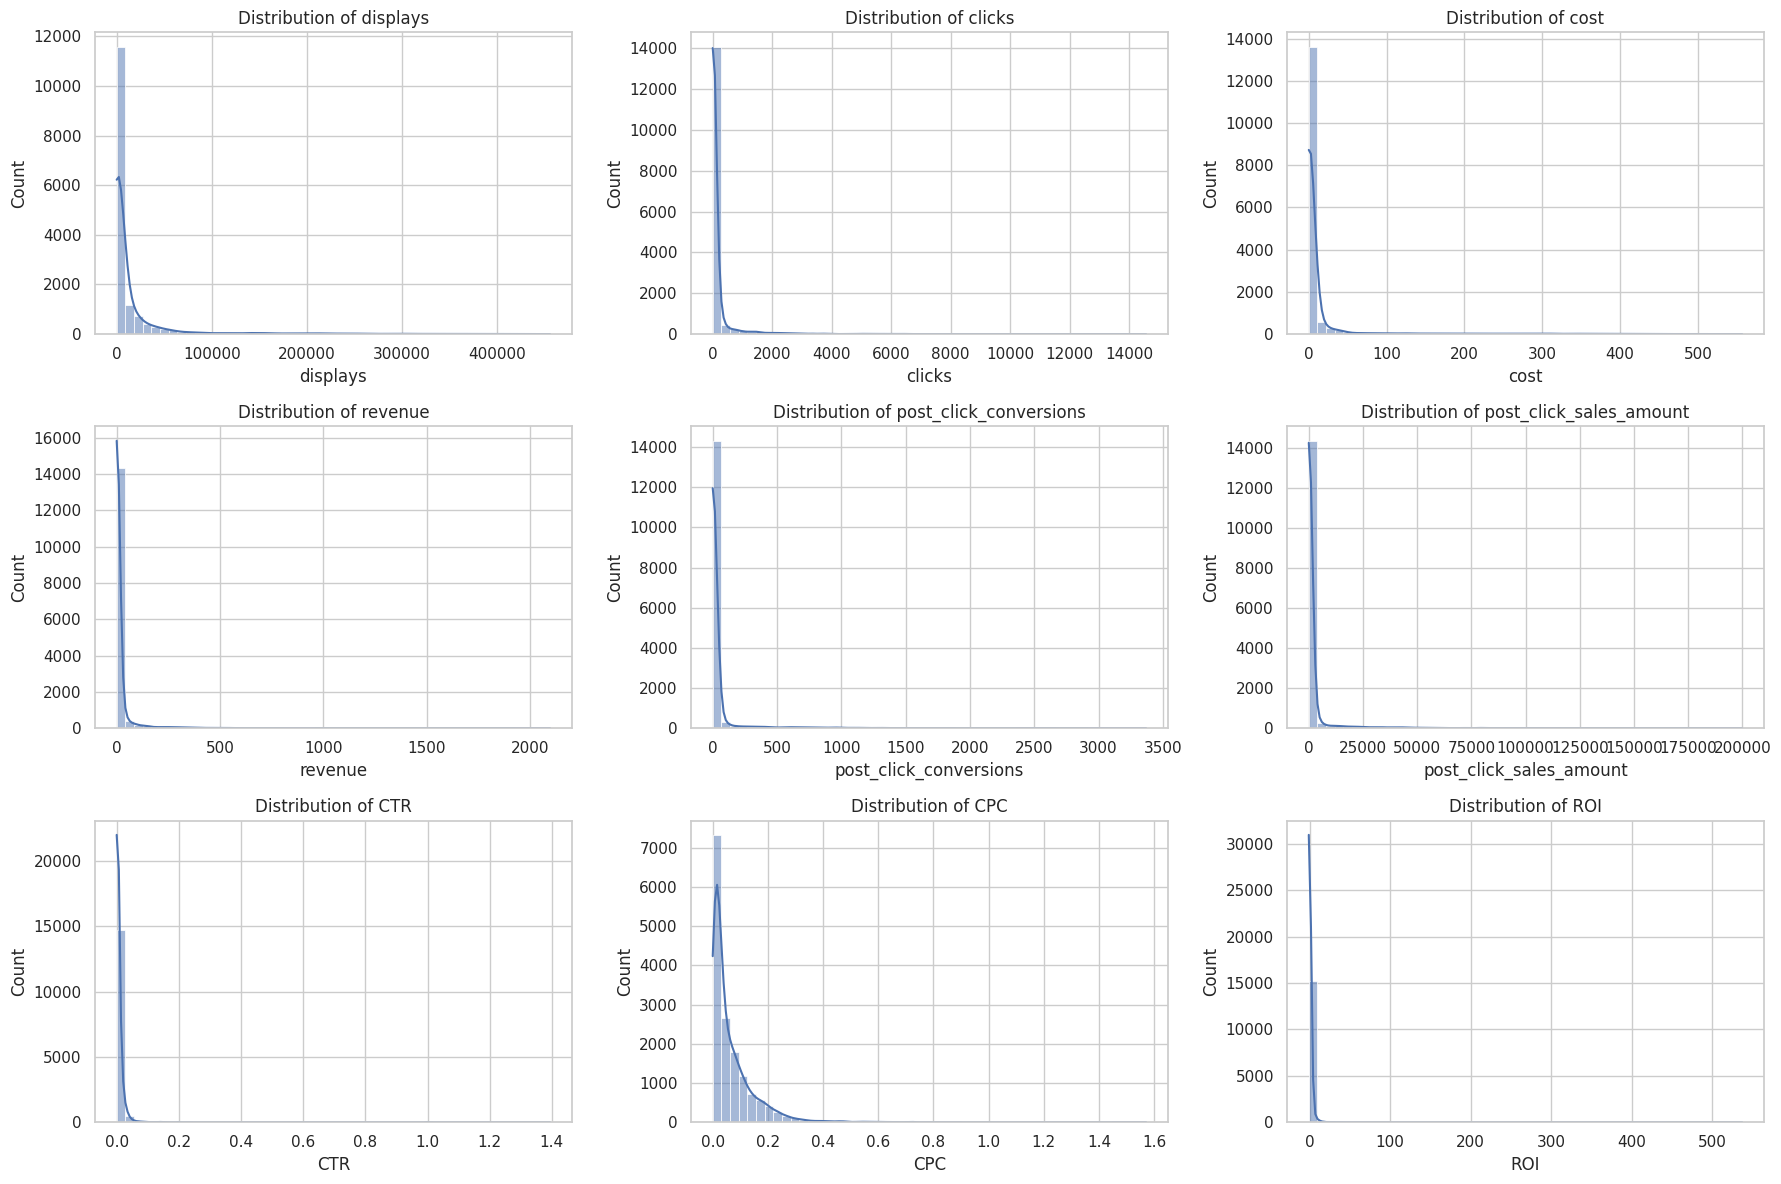

In [ ]:
#step 2
sns.set(style="whitegrid")

# Select core performance features for visualization
performance_features = ['displays', 'clicks', 'cost', 'revenue', 'post_click_conversions',
                        'post_click_sales_amount', 'CTR', 'CPC', 'ROI']

# Plot distributions of key performance metrics
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(performance_features):
    sns.histplot(df[feature], bins=50, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# **`**OBSERVATIONS**`**
Cost & Revenue: Similarly skewed; most campaigns cost and earn little, while some generate significantly more.

Post-click conversions and sales: Show long-tail behavior, indicating only a subset of campaigns are highly effective.

CTR & ROI: Skewed right but show a variety of performance levels—opportunity for segmentation or optimization.

In [ ]:
#step 3
desc_stats = df[['displays', 'clicks', 'cost', 'revenue', 'CTR', 'CPC', 'ROI',
                 'post_click_conversions', 'post_click_sales_amount']].describe().T

# Add skewness and kurtosis
desc_stats['skewness'] = df[desc_stats.index].skew()
desc_stats['kurtosis'] = df[desc_stats.index].kurt()
print(desc_stats)

                           count          mean           std  min        25%  \
displays                 15408.0  15512.573014  44392.392890  0.0  78.000000   
clicks                   15408.0    161.788487    728.276911  0.0   0.000000   
cost                     15408.0     11.370262     45.369499  0.0   0.024000   
revenue                  15408.0     17.929943     96.781834  0.0   0.000000   
CTR                      15408.0      0.008169      0.032762  0.0   0.000000   
CPC                      15408.0      0.066109      0.084928  0.0   0.014153   
ROI                      15408.0      0.919771      9.542164 -1.0  -1.000000   
post_click_conversions   15408.0     42.300623    213.685660  0.0   0.000000   
post_click_sales_amount  15408.0   2123.288058  10523.029607  0.0   0.000000   

                                 50%          75%            max   skewness  \
displays                 1182.000000  8960.250000  455986.000000   5.069507   
clicks                      6.000000    5

In [ ]:
#anova
anova_roi = stats.f_oneway(
    df[df['user_engagement'] == 'High']['ROI'],
    df[df['user_engagement'] == 'Medium']['ROI'],
    df[df['user_engagement'] == 'Low']['ROI']
)

print("ANOVA F-statistic:", anova_roi.statistic)
print("p-value:", anova_roi.pvalue)

ANOVA F-statistic: 54.81578112654036
p-value: 1.8972248412528157e-24


In [ ]:
#t test
# Compute average CTR per banner
banner_ctr = df.groupby('banner')['CTR'].mean()

# Top and bottom 25% banners by CTR
top_banners = banner_ctr[banner_ctr >= banner_ctr.quantile(0.75)].index
bottom_banners = banner_ctr[banner_ctr <= banner_ctr.quantile(0.25)].index

# Independent t-test
t_test_ctr = stats.ttest_ind(
    df[df['banner'].isin(top_banners)]['CTR'],
    df[df['banner'].isin(bottom_banners)]['CTR'],
    equal_var=False
)

print("T-test for CTR difference between top and bottom banners:")
print("T-statistic:", t_test_ctr.statistic)
print("p-value:", t_test_ctr.pvalue)

T-test for CTR difference between top and bottom banners:
T-statistic: 5.9139513004545625
p-value: 3.743762134895881e-09


In [ ]:
correlation_matrix = df[['CTR', 'CPC', 'ROI', 'cost', 'revenue',
                         'post_click_conversions', 'post_click_sales_amount']].corr()
print(correlation_matrix)

                              CTR       CPC       ROI      cost   revenue  \
CTR                      1.000000 -0.064811  0.596232  0.027009  0.046926   
CPC                     -0.064811  1.000000 -0.078378  0.218057  0.059958   
ROI                      0.596232 -0.078378  1.000000 -0.009005  0.013648   
cost                     0.027009  0.218057 -0.009005  1.000000  0.760520   
revenue                  0.046926  0.059958  0.013648  0.760520  1.000000   
post_click_conversions   0.027546  0.132752  0.000777  0.841650  0.880404   
post_click_sales_amount  0.029389  0.130745  0.001124  0.842063  0.887139   

                         post_click_conversions  post_click_sales_amount  
CTR                                    0.027546                 0.029389  
CPC                                    0.132752                 0.130745  
ROI                                    0.000777                 0.001124  
cost                                   0.841650                 0.842063  
revenue 

<ipython-input-12-a96c64964101>:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


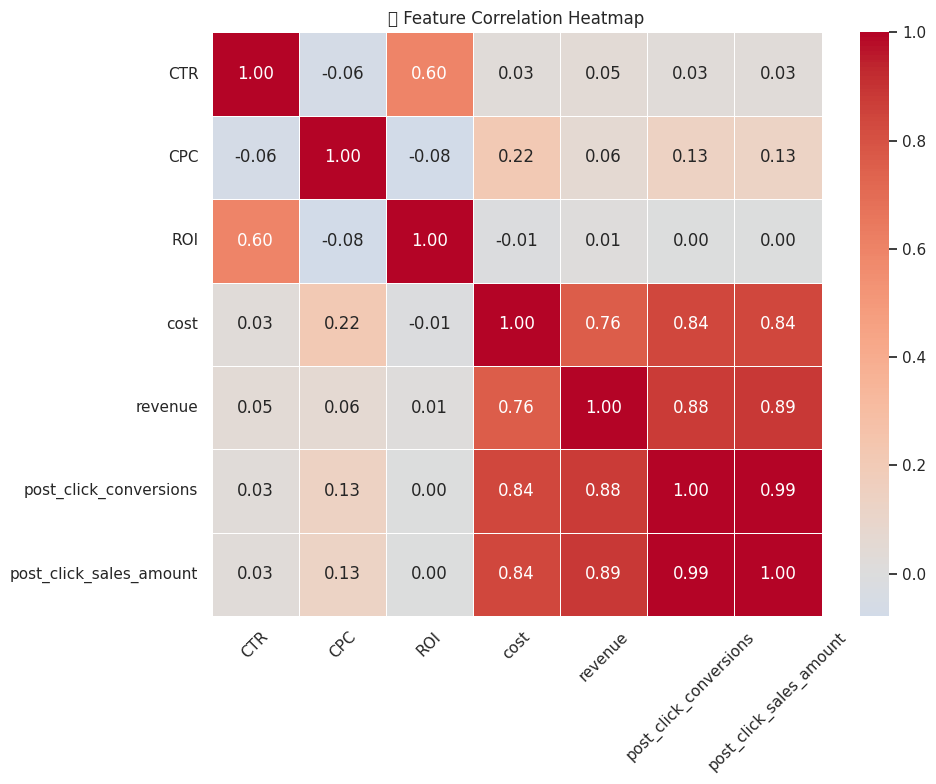

In [ ]:
#corelation heatmap
# Select numeric columns
numeric_cols = ['CTR', 'CPC', 'ROI', 'cost', 'revenue',
                'post_click_conversions', 'post_click_sales_amount']

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Set plot size and style
plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')

# Draw heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)

plt.title('📊 Feature Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#step 4
# Step 1: Define High ROI as ROI > median
df['high_roi'] = (df['ROI'] > df['ROI'].median()).astype(int)

# Step 2: Define features and target
X = df_encoded.drop(columns=['ROI'])  # drop original ROI for modeling
y = df['high_roi']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 6: Evaluate
y_pred = model.predict(X_test_scaled)

print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1534
           1       0.99      0.99      0.99      1548

    accuracy                           0.99      3082
   macro avg       0.99      0.99      0.99      3082
weighted avg       0.99      0.99      0.99      3082


📊 Confusion Matrix:
[[1520   14]
 [   8 1540]]
